In [26]:
import time
import random
import matplotlib.pyplot as plt

In [27]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

In [28]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

In [29]:
def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

In [30]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

In [31]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr.pop()
        less_than_pivot = []
        greater_than_pivot = []
        for element in arr:
            if element <= pivot:
                less_than_pivot.append(element)
            else:
                greater_than_pivot.append(element)
        return quick_sort(less_than_pivot) + [pivot] + quick_sort(greater_than_pivot)

In [32]:
def generate_random_array(size):
    return [random.randint(1, 1000) for _ in range(size)]

In [33]:
def measure_execution_time(sorting_function, input_data):
    start_time = time.time()
    sorting_function(input_data.copy())
    end_time = time.time()
    return end_time - start_time

In [34]:
# Sizes of input arrays
array_sizes = [100, 500, 1000, 2000, 5000]

In [35]:
# Dictionary to store execution times for each sorting algorithm
sorting_functions = {
    'Bubble Sort': bubble_sort,
    'Insertion Sort': insertion_sort,
    'Selection Sort': selection_sort,
    'Merge Sort': merge_sort,
    'Quick Sort': quick_sort
}

In [37]:
# Perform sorting and measure execution times
execution_times = {algorithm: [] for algorithm in sorting_functions.keys()}

for size in array_sizes:
    input_data = generate_random_array(size)
    for algorithm, sorting_function in sorting_functions.items():
        execution_time = measure_execution_time(sorting_function, input_data)
        execution_times[algorithm].append(execution_time)

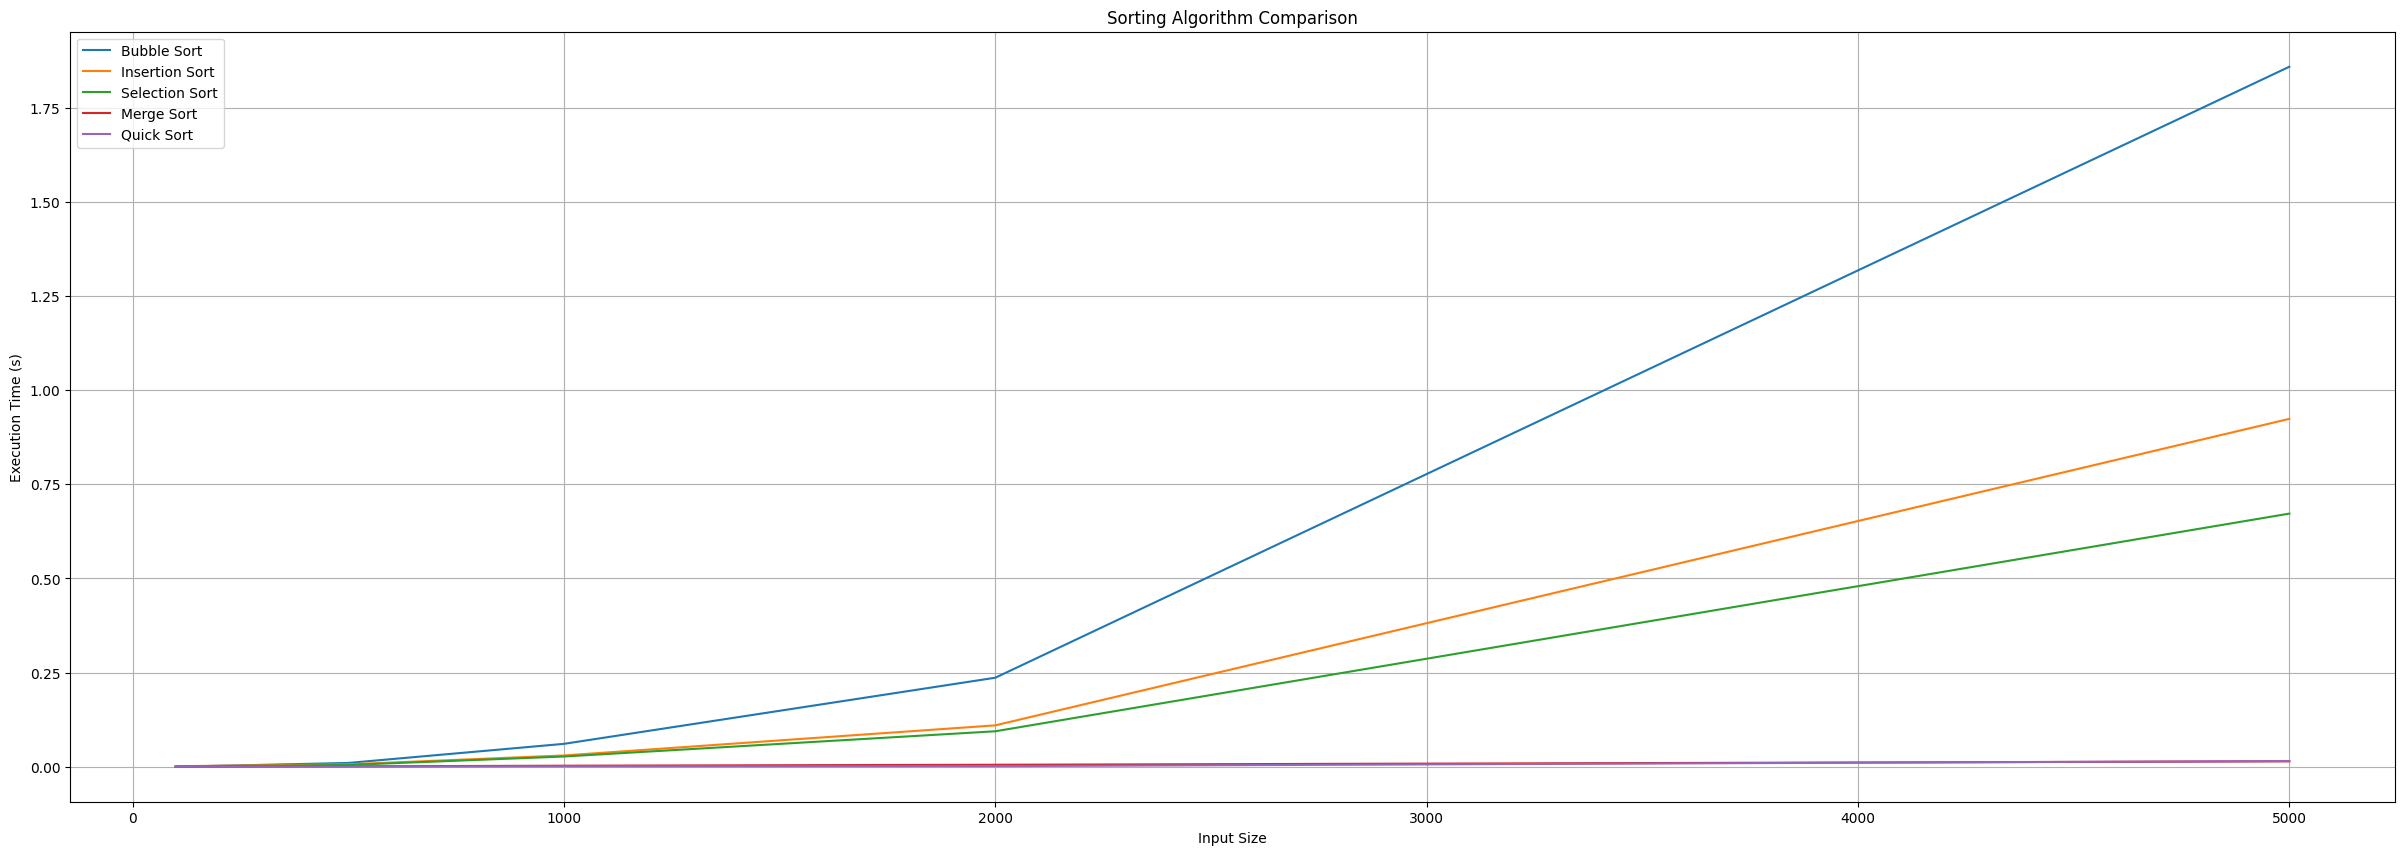

In [47]:
# Plotting the results
plt.figure(figsize=(30, 10))

for algorithm, times in execution_times.items():
    plt.plot(array_sizes, times, label=algorithm)

plt.title('Sorting Algorithm Comparison')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (s)')
plt.legend()
plt.grid(True)
plt.show()